In [32]:
import nltk
from nltk.corpus import gutenberg

nltk.download("gutenberg")


[nltk_data] Downloading package gutenberg to /home/vscode/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [33]:
for idx, fileid in enumerate(gutenberg.fileids()):
    print(f"#{idx+1} {fileid}")


#1 austen-emma.txt
#2 austen-persuasion.txt
#3 austen-sense.txt
#4 bible-kjv.txt
#5 blake-poems.txt
#6 bryant-stories.txt
#7 burgess-busterbrown.txt
#8 carroll-alice.txt
#9 chesterton-ball.txt
#10 chesterton-brown.txt
#11 chesterton-thursday.txt
#12 edgeworth-parents.txt
#13 melville-moby_dick.txt
#14 milton-paradise.txt
#15 shakespeare-caesar.txt
#16 shakespeare-hamlet.txt
#17 shakespeare-macbeth.txt
#18 whitman-leaves.txt


In [34]:
import re

authors = set()

for fileid in gutenberg.fileids():
    match = re.search(r"^(.+?)-", fileid)
    if match:
        authors.add(match.group(1))

book_data_dict = {}

for index, author in enumerate(authors):
    books = [gutenberg.paras(fileid) for fileid in gutenberg.fileids() if author in fileid]
    para_num = len([paras for book in books for paras in book])
    book_data_dict[author] = para_num

sorted_dict: dict[str, int] = dict(
    sorted(book_data_dict.items(), key=lambda pd: pd[1], reverse=True)
)

for idx, item in enumerate(sorted_dict.items()):
    print(f"{idx + 1}: {item[0]} - {item[1]} paragraphs")


1: bible - 24608 paragraphs
2: austen - 5265 paragraphs
3: chesterton - 4055 paragraphs
4: edgeworth - 3726 paragraphs
5: melville - 2793 paragraphs
6: whitman - 2478 paragraphs
7: shakespeare - 2372 paragraphs
8: bryant - 1194 paragraphs
9: carroll - 817 paragraphs
10: blake - 284 paragraphs
11: burgess - 266 paragraphs
12: milton - 29 paragraphs


In [35]:
import grammar_analysis as ga

TARGET = "chesterton"
NON_TARGET = "carroll"

nontarget_books = [
    gutenberg.paras(file_id) for file_id in gutenberg.fileids() if NON_TARGET in file_id
]
target_books = [gutenberg.paras(file_id) for file_id in gutenberg.fileids() if TARGET in file_id]

nontarget_paras = [paras for book in nontarget_books for paras in book]
target_paras = [paras for book in target_books for paras in book]

for para in nontarget_paras[:50]:
    print(" ".join(ga.para2sent(para)))
print(f"...\n\nAuthor: {NON_TARGET}, {len(nontarget_paras)} paragraphs")


[ Alice ' s Adventures in Wonderland by Lewis Carroll 1865 ]
CHAPTER I . Down the Rabbit - Hole
Alice was beginning to get very tired of sitting by her sister on the bank , and of having nothing to do : once or twice she had peeped into the book her sister was reading , but it had no pictures or conversations in it , ' and what is the use of a book ,' thought Alice ' without pictures or conversation ?'
So she was considering in her own mind ( as well as she could , for the hot day made her feel very sleepy and stupid ), whether the pleasure of making a daisy - chain would be worth the trouble of getting up and picking the daisies , when suddenly a White Rabbit with pink eyes ran close by her .
There was nothing so VERY remarkable in that ; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself , ' Oh dear ! Oh dear ! I shall be late !' ( when she thought it over afterwards , it occurred to her that she ought to have wondered at this , but at the time it all

In [36]:
for para in target_paras[:50]:
    print(" ".join(ga.para2sent(para)))
print(f"...\n\nAuthor: {TARGET}, {len(target_paras)} paragraphs")


[ The Ball and The Cross by G . K . Chesterton 1909 ]
I . A DISCUSSION SOMEWHAT IN THE AIR
The flying ship of Professor Lucifer sang through the skies like a silver arrow ; the bleak white steel of it , gleaming in the bleak blue emptiness of the evening . That it was far above the earth was no expression for it ; to the two men in it , it seemed to be far above the stars . The professor had himself invented the flying machine , and had also invented nearly everything in it . Every sort of tool or apparatus had , in consequence , to the full , that fantastic and distorted look which belongs to the miracles of science . For the world of science and evolution is far more nameless and elusive and like a dream than the world of poetry and religion ; since in the latter images and ideas remain themselves eternally , while it is the whole idea of evolution that identities melt into each other as they do in a nightmare .
All the tools of Professor Lucifer were the ancient human tools gone mad

In [37]:
from grammar_analysis import FrequencyCalculator

fc = FrequencyCalculator()
all_tags: set[str] = set()

for paras in nontarget_paras + target_paras:
    for para in paras:
        all_tags.update(fc.all_pos_frequency(para).keys())

print(all_tags)


{'EX', 'WDT', 'PRP', ':', 'NNPS', 'NNP', 'WRB', 'VBD', 'NN', 'POS', ')', 'RP', 'VBZ', 'MD', 'CC', 'JJR', 'VBP', 'JJ', '``', 'PRP$', 'SYM', 'WP', 'JJS', 'WP$', 'VBN', 'VB', 'TO', ',', "''", 'RBR', 'PDT', 'RBS', '.', 'DT', 'CD', 'UH', 'LS', '(', 'VBG', '$', 'RB', 'FW', 'NNS', 'IN'}


In [38]:
from grammar_analysis import DatasetGenerator
import pandas as pd
import numpy as np

dg = DatasetGenerator(all_tags)
data = []
correctness = []

for a_para in nontarget_paras:
    x, y = dg.generate_dataset_para(a_para, all_tags, False)
    data.append(x)
    correctness.append(y)

for b_para in target_paras:
    x, y = dg.generate_dataset_para(b_para, all_tags, True)
    data.append(x)
    correctness.append(y)

df = pd.DataFrame(data, columns=dg.columns)
nd_correctness = np.array(correctness)

display(df.head(10))


,word variation,uncommon word frequency,sentence length,average word length,EX,WDT,PRP,:,NNPS,NNP,...,CD,UH,LS,(,VBG,$,RB,FW,NNS,IN
0,1.000000,0.750000,12,4.083333,0.000000,0.0,0.000000,0.000000,0.0,0.083333,...,0.083333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.083333,0.083333
1,1.000000,0.875000,8,3.375000,0.000000,0.0,0.125000,0.125000,0.0,0.125000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.707692,0.461538,65,3.769231,0.000000,0.0,0.030769,0.015385,0.0,0.015385,...,0.000000,0.000000,0.0,0.000000,0.015385,0.0,0.015385,0.000000,0.015385,0.015385
3,0.822581,0.564516,62,3.790323,0.000000,0.0,0.016129,0.016129,0.0,0.016129,...,0.000000,0.000000,0.0,0.016129,0.016129,0.0,0.016129,0.000000,0.016129,0.016129
4,0.620482,0.536145,166,3.572289,0.006024,0.0,0.024096,0.018072,0.0,0.006024,...,0.000000,0.012048,0.0,0.006024,0.006024,0.0,0.006024,0.000000,0.006024,0.006024
5,1.000000,0.478261,23,3.869565,0.000000,0.0,0.043478,0.000000,0.0,0.043478,...,0.000000,0.000000,0.0,0.000000,0.043478,0.0,0.043478,0.000000,0.000000,0.043478
6,0.863636,0.522727,44,4.113636,0.000000,0.0,0.022727,0.022727,0.0,0.022727,...,0.000000,0.000000,0.0,0.000000,0.022727,0.0,0.022727,0.000000,0.000000,0.022727
7,0.585987,0.477707,157,3.598726,0.000000,0.0,0.006369,0.006369,0.0,0.006369,...,0.012739,0.000000,0.0,0.000000,0.006369,0.0,0.006369,0.000000,0.006369,0.006369
8,0.800000,0.615385,65,3.246154,0.000000,0.0,0.015385,0.000000,0.0,0.015385,...,0.000000,0.000000,0.0,0.015385,0.015385,0.0,0.015385,0.000000,0.015385,0.015385
9,0.630303,0.600000,165,3.484848,0.006061,0.0,0.006061,0.006061,0.0,0.012121,...,0.006061,0.006061,0.0,0.012121,0.006061,0.0,0.006061,0.006061,0.006061,0.006061


In [39]:
print(df.shape)


(4872, 48)


In [40]:
print(df.dtypes)


word variation             float64
uncommon word frequency    float64
sentence length              int64
average word length        float64
EX                         float64
WDT                        float64
PRP                        float64
:                          float64
NNPS                       float64
NNP                        float64
WRB                        float64
VBD                        float64
NN                         float64
POS                        float64
)                          float64
RP                         float64
VBZ                        float64
MD                         float64
CC                         float64
JJR                        float64
VBP                        float64
JJ                         float64
``                         float64
PRP$                       float64
SYM                        float64
WP                         float64
JJS                        float64
WP$                        float64
VBN                 

In [41]:
print(df.isna().sum())


word variation             0
uncommon word frequency    0
sentence length            0
average word length        0
EX                         0
WDT                        0
PRP                        0
:                          0
NNPS                       0
NNP                        0
WRB                        0
VBD                        0
NN                         0
POS                        0
)                          0
RP                         0
VBZ                        0
MD                         0
CC                         0
JJR                        0
VBP                        0
JJ                         0
``                         0
PRP$                       0
SYM                        0
WP                         0
JJS                        0
WP$                        0
VBN                        0
VB                         0
TO                         0
,                          0
''                         0
RBR                        0
PDT           

In [42]:
import sklearn
import lightgbm as lgb

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, nd_correctness)

model = lgb.LGBMClassifier()
model.fit(X_train.values, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

val = sklearn.metrics.roc_auc_score(y_test, y_pred_prob)
print(f"auc-rocスコア: {val}")


auc-rocスコア: 0.9513332946590866


In [43]:
display(pd.crosstab(y_test, y_pred))


col_0,False,True
row_0,,
False,145,59
True,35,979


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


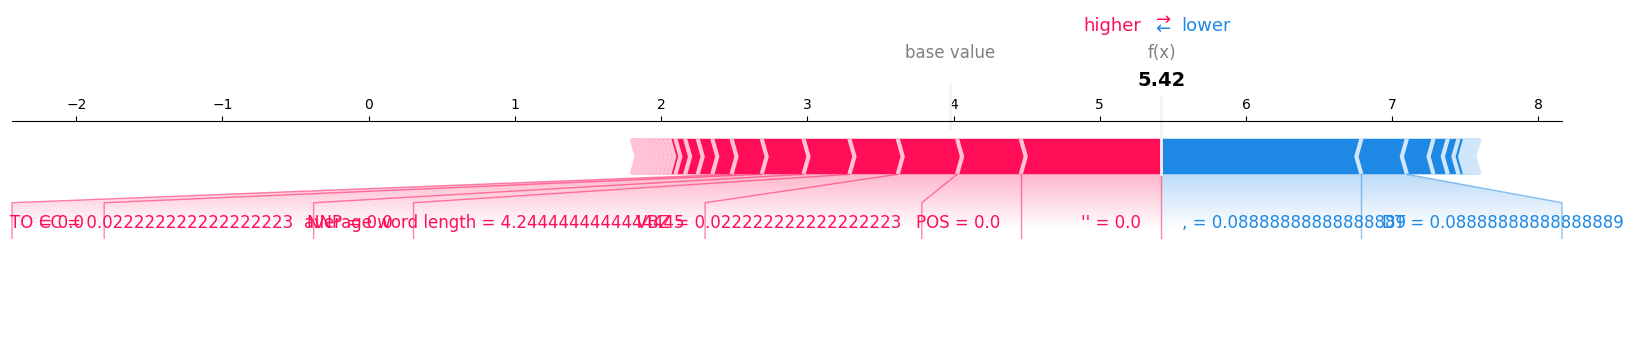

In [44]:
import shap

exp = shap.TreeExplainer(model)
sv_test = exp.shap_values(X_test)[1]

shap.initjs()
shap.force_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0], matplotlib=True)


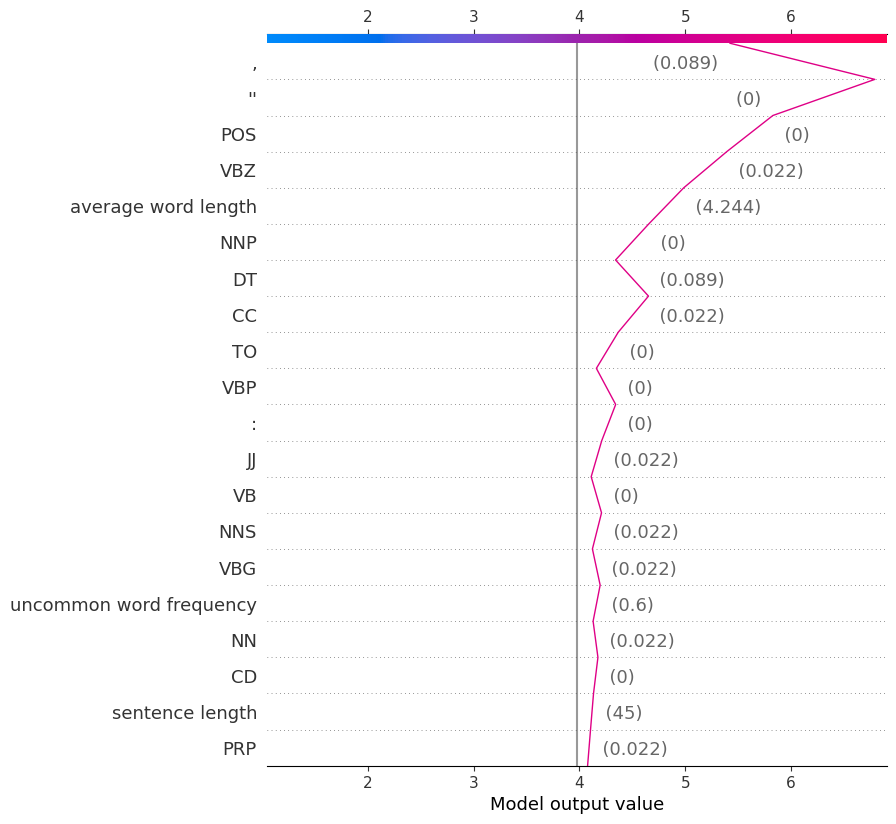

In [45]:
shap.decision_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


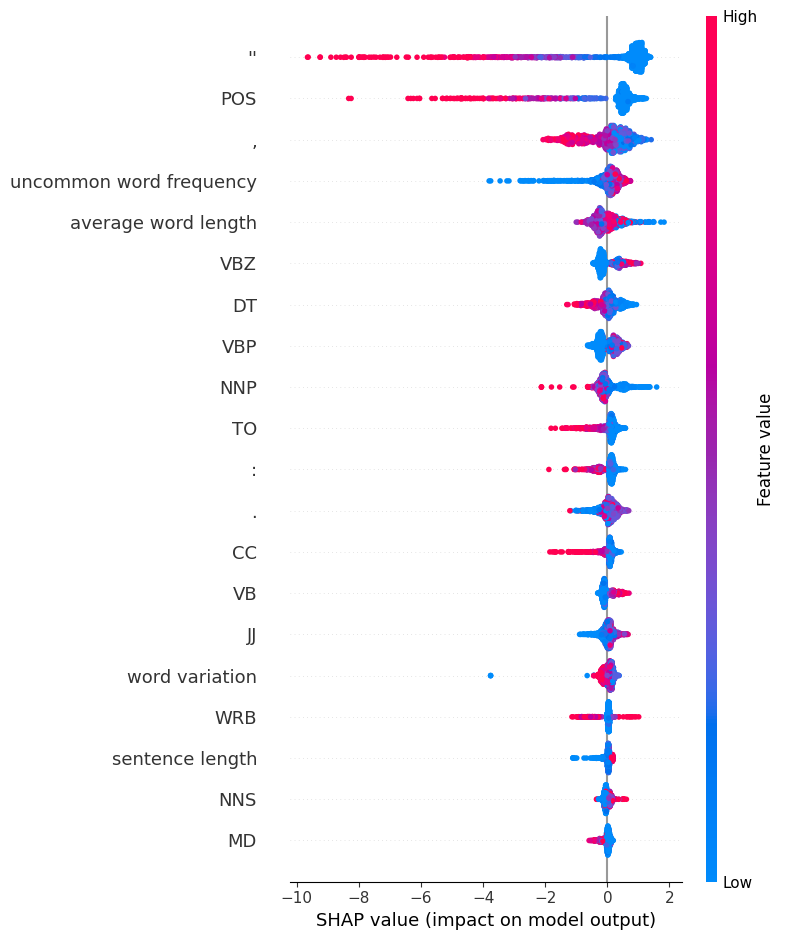

In [46]:
shap.summary_plot(sv_test, X_test)


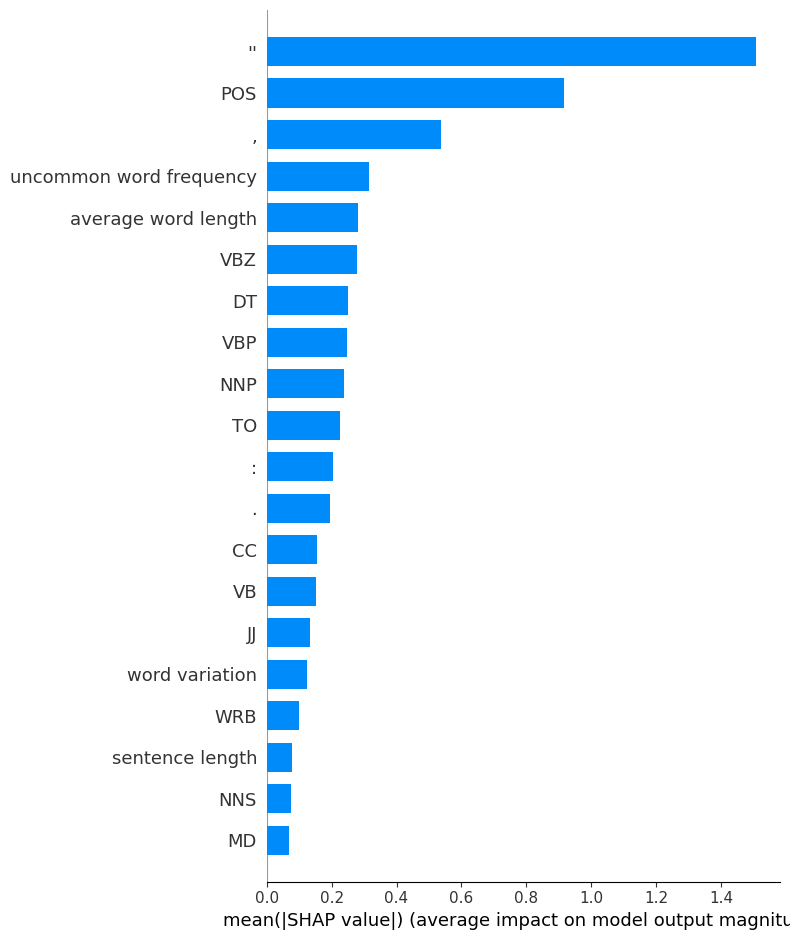

In [47]:
shap.summary_plot(sv_test, X_test, plot_type="bar")
